In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

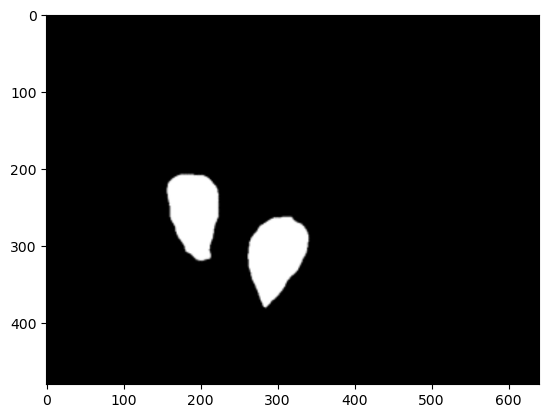

In [3]:
mask  = cv2.imread('mask.png').astype(np.uint8)
mask = cv2.resize(mask, (640,480), interpolation = cv2.INTER_LINEAR )
mask1 = mask[:,:,0]
mask_org  = copy.deepcopy(mask)
contours, hierarchy = cv2.findContours(mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
len(contours)

2

In [23]:
def find_furthest_points(cnt):
    furthest_points = None
    points_position  = None
    max_dist_prev = 0
    for i, points in enumerate(cnt):
        max_dist = np.max(np.linalg.norm(cnt-points,axis=1))
        if max_dist>max_dist_prev:
            max_index = [i, np.argmax(np.linalg.norm(cnt-points,axis=1))]
        max_dist_prev = max_dist
    print(max_index)
    return max_index
def find_midpoint(point1, point2):
    return np.array([(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) /2])  

def find_y_intercept(mid_point, slope):
    return mid_point[1] - slope * mid_point[0]


def calculate_slope(point1, point2):
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0]) if point2[0] != point1[0] else float('inf')
    return -1/slope

def distance_to_line(x0, y0, a, b):
    return abs(a * x0 - y0 + b) / np.sqrt(a**2 + 1)


def find_leaf_corner(contour):
    point1,point2 = contour[find_furthest_points(contour)]
    midpoint = find_midpoint(point1, point2)
    slope = calculate_slope(point1,point2)
    intercept = find_y_intercept(midpoint.astype(int),slope)
    dist_list = np.zeros(contour.shape[0])
    for index,p in enumerate(contour):
        dist_list[index] = distance_to_line(p[0],p[1],slope, intercept)
    result = dist_list
    smallest_index = np.argpartition(abs(result), 20)[:20]
    point3 = contour[smallest_index[0]]
    point4_index = np.argmin(np.linalg.norm((contour[smallest_index]+point3-2*midpoint),axis=1))
    point4 = contour[smallest_index[point4_index]]
    return (point1, point2, point3, point4, midpoint)
def draw_leaf_corner(corners, mask):
    for point in corners:
        cv2.circle(mask, point.astype(int), 5, (255, 0, 255), -1)  # Red point
    return
    
    
    
    

[175, 67]
[154, 79]


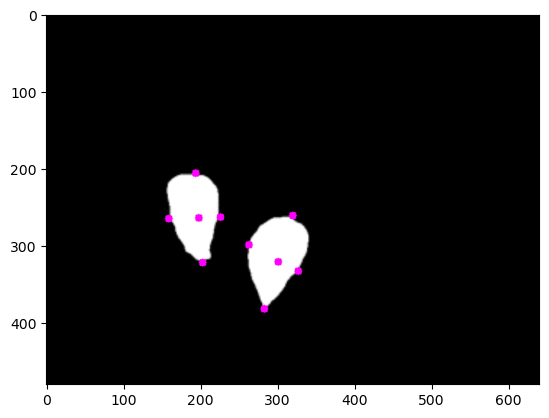

In [24]:
mask = copy.deepcopy(mask_org)
# point1,point2 = contour[find_furthest_points(contour)]

for cnt in contours:
    cnt = cnt.reshape(-1,2)
    corners = find_leaf_corner(cnt)
    draw_leaf_corner(corners, mask)

plt.imshow(mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()